In [13]:
# coding: utf-8

# # ZMS LAB 02 - case PITU
# 
# kontakt: annaszczurek2@gmail.com

# ## Kiedy ruina = RUINA ?
# 
# *opr. P. Wojewnik na podstawie:*
# 
# *„Optymalizacja portfela szkód” K. Saduś, M. Kwiecień, R. Lipiński* oraz *„Ubezpieczenia komunikacyjne firmy ABC” A. Kołota, M. Mączyńska*
# 
# 
# Prezes zarządu zakładu ubezpieczeń PiTU S.A., Marcin R., zasłyszał, że Prezydent planuje naturalizować wszystkich chętnych z Dżydżykistanu. *No to teraz się zacznie*, pomyślał, *Dżydżykowie jeżdżą jak wariaci, wzrośnie szkodowość, a więc musimy podnieść dla nich ceny.* 
# 
# Marcin R. dzwoni do aktuariuszki – Aldony P., ale tu czeka go niespodzianka. *Mój synek zachorował... Grypa to nic wielkiego... Ale w świńskim wydaniu bywa niebezpieczna.* Marcin z bólem serca odsyła Aldonę do domu, a zlecenie dostaje Marek T., asystent Aldony. Pytanie brzmi: **czy składka 500 zł jest wystarczająca ?**
# 
# Dotychczasowe doświadczenia PiTU S.A. z Dżydżykami są następujące:
# 
# <table>
# <tr></tr>
# <tr><td>
# 
# | Liczba szkód    | Liczba polis
# |-----------------|-------------
# | 0               | 3 437
# | 1               | 522
# | 2               | 40
# | 3               | 2
# | 4               | 0
# | 5               | 0
# 
# </td><td>
# 
# | Wielkość szkody | Liczba szkód
# |-----------------|-------------
# | -               | 0
# | 100             | 0
# | 200             | 2
# | 500             | 27
# | 1 000           | 52
# | 2 000           | 115
# | 5 000           | 203
# | 10 000          | 106
# | 20 000          | 42
# | 40 000          | 14
# | 50 000          | 0
# | 55 000          | 0
# | 60 000          | 1
# 
# </td></tr> </table>
# 
# Aldona rzuciła jeszcze przez telefon, że **liczbę szkód dobrze opisuje rozkład Poissona**, natomiast **wielkość szkód – rozkład log-normalny**. Z Marcina udało się wydusić **oczekiwaną liczbę klientów – 100** – oraz **aktualną nadwyżkę 10 000**.
# 
# 
# **Pytania:**
# 1.	Jaką ustalić składkę OC, aby ruina kierowców nie była udziałem PiTU S.A.?
# 2.	Czy nadwyżka końcowa będzie równa początkowej?
# 3.	Jakie jest zagrożenie ruiną?
# 4.	Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01?
# 

# ## ROZWIĄZANIE
# 
# opr. P

# In[ ]:

In [14]:
path = r"C:/Users/Michal.Puchalski/Desktop/private/ZMS/ZMS"

import csv
import scipy as sc
import matplotlib.pyplot as plt
from scipy.stats.stats import kstest
import numpy as np
from pandas import DataFrame

%matplotlib inline

<BarContainer object of 6 artists>

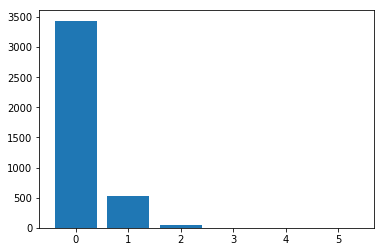

In [15]:
# ## 1. Dane - rozkłady, wyznaczanie parametrów
# 
# ### Liczba szkód

# In[ ]:


liczba_szkod = {0 : 3437, 
                1 : 522, 
                2 : 40, 
                3 : 2, 
                4 : 0, 
                5 : 0}

plt.bar(list(liczba_szkod.keys()), 
        list(liczba_szkod.values()))

In [16]:
# In[ ]:


# średnia liczbę szkód:
SREDNIA_LICZBA_SZKOD = (sum([x * y for x, y in liczba_szkod.items()]) / 
                        sum(liczba_szkod.values()))

# czy liczba szkód ma faktycznie rozklad Poissona?
poisson_test = [sc.stats.poisson.pmf(i, SREDNIA_LICZBA_SZKOD) * 
                sum(liczba_szkod.values()) for i in range(len(liczba_szkod))]

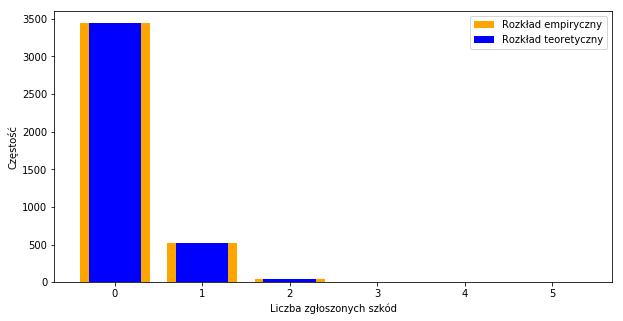

In [17]:
fig = plt.figure(figsize = (10,5))
plt.bar(list(liczba_szkod.keys()), poisson_test, color = "orange")
plt.bar(list(liczba_szkod.keys()), list(liczba_szkod.values()), color = 'blue', width = 0.6)
plt.ylabel('Częstość')
plt.xlabel('Liczba zgłoszonych szkód')
plt.legend(['Rozkład empiryczny', 'Rozkład teoretyczny'])
#fig.savefig(path+r'\rozklad_l_szkod.pdf')

In [18]:
# In[ ]:


# test chi-kwadrat z biblioteki scipy pomoże odpowiedziec na pytanie:
test1 = sc.stats.chisquare(list(liczba_szkod.values()), f_exp = poisson_test)
if test1[1] > 0.05:
    print ("brak podstaw do odrzucenia hipotezy zerowej")
else:
    print("należy odrzucic hipoteze zerowa")

brak podstaw do odrzucenia hipotezy zerowej


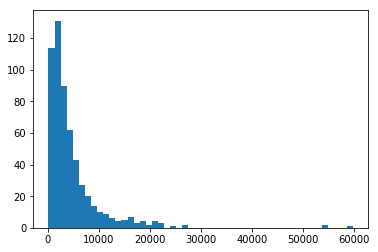

Srednia wielkosc szkod: 4742.0


In [19]:
# ### Wielkość szkód

# In[ ]:


szkody = []
with open(path+'\\szkody.txt','r') as csvfile:
    reader = csv.reader (csvfile, delimiter=";")
    for row in reader:
        szkody.append(int(row[1]))

plt.hist(szkody, bins=50)
plt.show()

print ("Srednia wielkosc szkod:", round(sc.mean(szkody))) 

In [20]:
# In[ ]:


# wielkość szkód ma rozkład log-normalny:
szkody_ln = sc.log(szkody)

# ... czy faktycznie? test K-S
test2 = kstest(szkody_ln, sc.stats.norm.cdf, 
               args = (sc.mean(szkody_ln), sc.std(szkody_ln)))
if test2[1] > 0.05:
    print ("p-value wyniosło:", round(test2[1], 4), 
           "- brak więc podstaw do odrzucenia hipotezy " +
           "o log-normalności rozkładu zmiennej")
else:
    print ("należy odrzucic hipotezę zerowa")

p-value wyniosło: 0.9979 - brak więc podstaw do odrzucenia hipotezy o log-normalności rozkładu zmiennej


In [21]:
# In[ ]:


# parametry wielkości szkód potrzebne do symulacji:
SR_SZKODA_LN = sc.mean(szkody_ln)
STD_SZKODA_LN = sc.std(szkody_ln)

Text(0, 0.5, 'Gęstość masy prawdopodobieństwa')

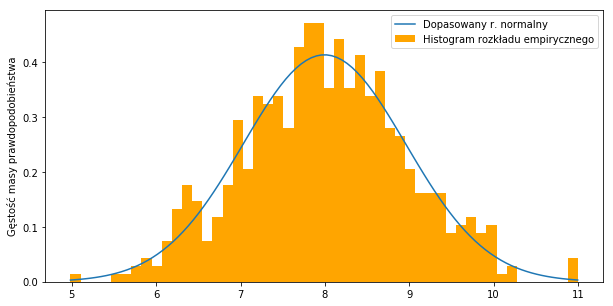

In [22]:
# Przesunalem nizej, zeby miec zdefiniowane zmienne juz ~PS
fig = plt.figure(figsize = (10,5))
plt.hist(szkody_ln, bins=50, density = True, color = 'orange')
x_norm = np.linspace(min(szkody_ln), max(szkody_ln), 100)
y_norm = sc.stats.norm.pdf(x_norm, SR_SZKODA_LN, STD_SZKODA_LN)
plt.plot(x_norm, y_norm)
plt.legend(['Dopasowany r. normalny', 'Histogram rozkładu empirycznego'])
plt.ylabel('Gęstość masy prawdopodobieństwa')
#fig.savefig(path+r'\rozklad_wys_szkody.pdf')

In [23]:
# ## 2. Model symulacji

# In[ ]:


def model (liczba_klientow, srednia_liczba_szkod, 
           sr_szkoda_ln, std_szkoda_ln, horyzont, 
           nadwyzka, skladka, seed):
    
    # Common Random Numbers aby moc porownac rozne scenariusze:
    sc.random.seed(seed) 

    # definiujemy daty umów klientow w symulacji:
    daty_umow = [sc.random.randint(0, 364) for i in range(liczba_klientow)]
    kalendarz_wplat = [0]*365
    for dataUmowy in daty_umow:
        kalendarz_wplat[dataUmowy] += 1

    # liczymy liczbe szkód przypadających na jednego klienta:
    liczba_szkod_klienta = sc.random.poisson(srednia_liczba_szkod, 
                                             liczba_klientow)
    
    # i ustalamy daty wyplaty dla wszystkich polis:
    kalendarz_wyplat = [0]*(365*horyzont) 
    for k in range(liczba_klientow):
        for s in range(liczba_szkod_klienta[k]):
            data_wyplaty = daty_umow[k] + sc.random.randint(0, 364)
            kalendarz_wyplat[data_wyplaty] += 1
    
    
    # analiza wyników firmy dla danego horyzontu czasowego i danych szkód:
    for dzien in range(365*horyzont):
        if dzien <= 364:
            nadwyzka += kalendarz_wplat[dzien] * skladka
        liczba_wyplat = kalendarz_wyplat[dzien]
        odszkodowania = 0 
        if liczba_wyplat > 0:
            odszkodowania = sum(sc.exp(sc.random.normal(sr_szkoda_ln, 
                                                        std_szkoda_ln, 
                                                        liczba_wyplat)))
        if nadwyzka < odszkodowania:
            return nadwyzka - odszkodowania
        else:
            pass
        nadwyzka -= odszkodowania
    return nadwyzka


# ### ... i funkcja, która go wywoła *n* razy

# In[ ]:

In [30]:
def wywolanie(nadwyzka, skladka, liczba_powtorzen, 
              liczba_klientow, srednia_liczba_szkod , 
              sr_szkoda_ln, std_szkoda_ln, horyzont):
    wynik = []
    bankructwo = 0
    wynik_dodatni = []
    for seed in range(liczba_powtorzen):
        wynik.append(model(liczba_klientow, srednia_liczba_szkod , 
                           sr_szkoda_ln, std_szkoda_ln, horyzont, 
                           nadwyzka, skladka, seed))
        if wynik[seed] < 0:
            bankructwo += 1
        if wynik[seed] > 0:
            wynik_dodatni.append(wynik[seed])
    sredni_wynik = sc.mean(wynik_dodatni)
    odch_stand_wynik = sc.std(wynik_dodatni)
    prawd_bankr = bankructwo / liczba_powtorzen
    return [bankructwo, prawd_bankr, sredni_wynik, odch_stand_wynik]


# ## 3. Symulacja

# In[ ]:


# zmienne i parametry w modelu:
sr_wynik = [] # średni wynik finansowy firmy
odch_stand_wynik = [] # Odch. stand. sredniego wyniku
wysokosc_skladki = []
wysokosc_nadwyzki = []
prawd_bankr = []
liczba_ruin = [] 

LICZBA_POWTORZEN = 1000
LICZBA_KLIENTOW = 100
HORYZONT = 2 # dlugość obowiązywania umowy - zakładamy 2 lata


for nadwyzka in range(5000, 21000, 1000):
    for skladka in range(500, 2100, 100):
        wartosc_f_xy = wywolanie(nadwyzka, skladka, 
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
                                 SREDNIA_LICZBA_SZKOD , SR_SZKODA_LN, 
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_skladki.append(skladka)
        wysokosc_nadwyzki.append(nadwyzka)
        liczba_ruin.append(wartosc_f_xy[0])
        prawd_bankr.append(wartosc_f_xy[1])
        sr_wynik.append(wartosc_f_xy[2])
        odch_stand_wynik.append(wartosc_f_xy[3])
        print("Nadwyzka: ", nadwyzka, "Skladka: ", skladka, 
              "Liczba ruin: ", wartosc_f_xy[0], "Sredni wynik: ",
              round(wartosc_f_xy[2]), "Prawd_bankr: ", wartosc_f_xy[1])

dane = DataFrame.from_dict({'nadwyzka': wysokosc_nadwyzki,
                            'skladka': wysokosc_skladki,
                            'liczba_ruin': liczba_ruin,
                            'prawd_bankr': prawd_bankr,
                            'sr_wynik': sr_wynik,
                            'odch_stand_wynik': odch_stand_wynik},
        orient = 'columns')

dane.set_index(['nadwyzka', 'skladka'], inplace = True)

Nadwyzka:  5000 Skladka:  500 Liczba ruin:  713 Sredni wynik:  13462.0 Prawd_bankr:  0.713
Nadwyzka:  5000 Skladka:  600 Liczba ruin:  565 Sredni wynik:  17282.0 Prawd_bankr:  0.565
Nadwyzka:  5000 Skladka:  700 Liczba ruin:  422 Sredni wynik:  21805.0 Prawd_bankr:  0.422
Nadwyzka:  5000 Skladka:  800 Liczba ruin:  292 Sredni wynik:  27040.0 Prawd_bankr:  0.292
Nadwyzka:  5000 Skladka:  900 Liczba ruin:  187 Sredni wynik:  33076.0 Prawd_bankr:  0.187
Nadwyzka:  5000 Skladka:  1000 Liczba ruin:  125 Sredni wynik:  40470.0 Prawd_bankr:  0.125
Nadwyzka:  5000 Skladka:  1100 Liczba ruin:  70 Sredni wynik:  47927.0 Prawd_bankr:  0.07
Nadwyzka:  5000 Skladka:  1200 Liczba ruin:  48 Sredni wynik:  56866.0 Prawd_bankr:  0.048
Nadwyzka:  5000 Skladka:  1300 Liczba ruin:  29 Sredni wynik:  65759.0 Prawd_bankr:  0.029
Nadwyzka:  5000 Skladka:  1400 Liczba ruin:  23 Sredni wynik:  75426.0 Prawd_bankr:  0.023
Nadwyzka:  5000 Skladka:  1500 Liczba ruin:  16 Sredni wynik:  84910.0 Prawd_bankr:  0.016

Nadwyzka:  10000 Skladka:  1600 Liczba ruin:  7 Sredni wynik:  99522.0 Prawd_bankr:  0.007
Nadwyzka:  10000 Skladka:  1700 Liczba ruin:  7 Sredni wynik:  109522.0 Prawd_bankr:  0.007
Nadwyzka:  10000 Skladka:  1800 Liczba ruin:  7 Sredni wynik:  119522.0 Prawd_bankr:  0.007
Nadwyzka:  10000 Skladka:  1900 Liczba ruin:  6 Sredni wynik:  129394.0 Prawd_bankr:  0.006
Nadwyzka:  10000 Skladka:  2000 Liczba ruin:  5 Sredni wynik:  139259.0 Prawd_bankr:  0.005
Nadwyzka:  11000 Skladka:  500 Liczba ruin:  615 Sredni wynik:  15496.0 Prawd_bankr:  0.615
Nadwyzka:  11000 Skladka:  600 Liczba ruin:  472 Sredni wynik:  20031.0 Prawd_bankr:  0.472
Nadwyzka:  11000 Skladka:  700 Liczba ruin:  324 Sredni wynik:  24569.0 Prawd_bankr:  0.324
Nadwyzka:  11000 Skladka:  800 Liczba ruin:  219 Sredni wynik:  30633.0 Prawd_bankr:  0.219
Nadwyzka:  11000 Skladka:  900 Liczba ruin:  128 Sredni wynik:  36929.0 Prawd_bankr:  0.128
Nadwyzka:  11000 Skladka:  1000 Liczba ruin:  82 Sredni wynik:  44829.0 Prawd_ban

Nadwyzka:  16000 Skladka:  1000 Liczba ruin:  57 Sredni wynik:  48677.0 Prawd_bankr:  0.057
Nadwyzka:  16000 Skladka:  1100 Liczba ruin:  38 Sredni wynik:  57693.0 Prawd_bankr:  0.038
Nadwyzka:  16000 Skladka:  1200 Liczba ruin:  20 Sredni wynik:  66569.0 Prawd_bankr:  0.02
Nadwyzka:  16000 Skladka:  1300 Liczba ruin:  16 Sredni wynik:  76289.0 Prawd_bankr:  0.016
Nadwyzka:  16000 Skladka:  1400 Liczba ruin:  9 Sredni wynik:  85711.0 Prawd_bankr:  0.009
Nadwyzka:  16000 Skladka:  1500 Liczba ruin:  8 Sredni wynik:  95619.0 Prawd_bankr:  0.008
Nadwyzka:  16000 Skladka:  1600 Liczba ruin:  7 Sredni wynik:  105522.0 Prawd_bankr:  0.007
Nadwyzka:  16000 Skladka:  1700 Liczba ruin:  7 Sredni wynik:  115522.0 Prawd_bankr:  0.007
Nadwyzka:  16000 Skladka:  1800 Liczba ruin:  7 Sredni wynik:  125522.0 Prawd_bankr:  0.007
Nadwyzka:  16000 Skladka:  1900 Liczba ruin:  5 Sredni wynik:  135259.0 Prawd_bankr:  0.005
Nadwyzka:  16000 Skladka:  2000 Liczba ruin:  4 Sredni wynik:  145163.0 Prawd_bankr

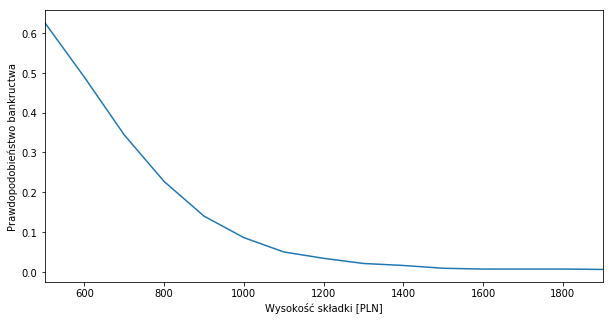

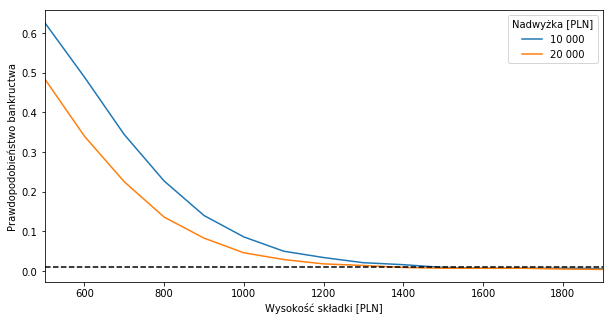

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
dane.loc[(10000,slice(None)),'prawd_bankr'].reset_index(). \
    plot(x = 'skladka', y = 'prawd_bankr', legend = False, ax = ax)
ax.set_xlabel('Wysokość składki [PLN]')
ax.set_ylabel('Prawdopodobieństwo bankructwa')
fig.savefig(path+r'\p_bankructwa.pdf')

fig, ax = plt.subplots(figsize = (10,5))
dane.loc[:,'prawd_bankr'].reset_index().groupby('nadwyzka'). \
    plot(x = 'skladka', y = 'prawd_bankr', ax = ax)
ax.set_xlabel('Wysokość składki [PLN]')
ax.set_ylabel('Prawdopodobieństwo bankructwa')
ax.legend(labels = ['10 000', '20 000'], title = 'Nadwyżka [PLN]')
ax.axhline(y = 0.01, color = 'k' , linestyle = '--')
#fig.savefig(path+r'\p_bankructwa_porownanie.pdf')


# Ponizej stary wykres p-stwa bankructwa (dla pojedynczej wys. nadwyzki)
#fig = plt.figure(figsize = (10,5))
#plt.plot(dane['wysokosc_skladki'], prawd_bankr)
#plt.ylabel('Prawdopodobienstwo bankructwa')
#plt.xlabel('Wysokość składki [PLN]')
#fig.savefig(path+'\p_bankructwa.pdf')

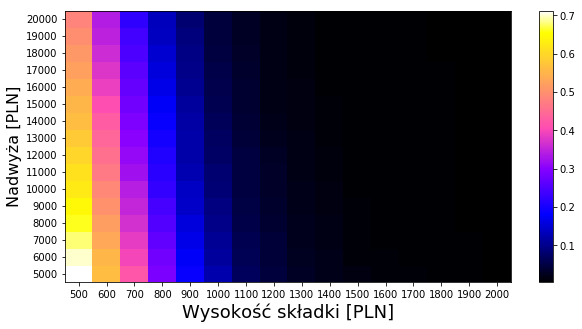

In [70]:
df2 = (dane.pivot_table(index='nadwyzka', columns='skladka', values='prawd_bankr').reset_index())

fig = plt.figure(figsize=(10,5))
heatmap = plt.pcolor(df2.iloc[:, 1:], cmap='gnuplot2')
plt.yticks(np.arange(0.5, len(df2.iloc[:,0]), 1), df2.iloc[:,0])
plt.xticks(np.arange(0.5, len(df2.columns[1:]), 1), df2.columns[1:])
plt.xlabel('Wysokość składki [PLN]', fontsize=18)
plt.ylabel('Nadwyża [PLN]', fontsize=16)
plt.colorbar(heatmap)
plt.show()

fig.savefig(path+r'\p_heatmapa_bankructwo.pdf')

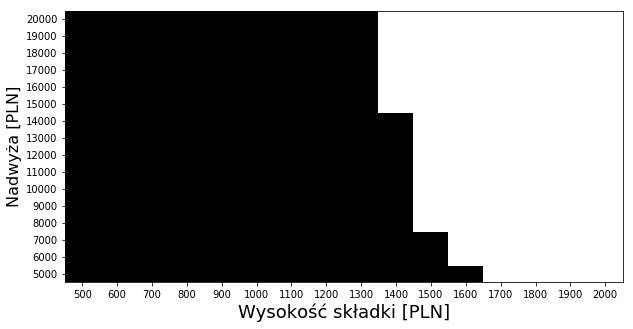

In [71]:
fig = plt.figure(figsize=(10,5))
heatmap = plt.pcolor(df2.iloc[:, 1:] <= 0.01, cmap='gnuplot2')
plt.yticks(np.arange(0.5, len(df2.iloc[:,0]), 1), df2.iloc[:,0])
plt.xticks(np.arange(0.5, len(df2.columns[1:]), 1), df2.columns[1:])
plt.xlabel('Wysokość składki [PLN]', fontsize=18)
plt.ylabel('Nadwyża [PLN]', fontsize=16)
plt.show()

fig.savefig(path+r'\p_heatmapa_bankructwo_mniej_niz_0,01.pdf')

Text(0, 0.5, 'Średnia nadwyżka końcowa [PLN]')

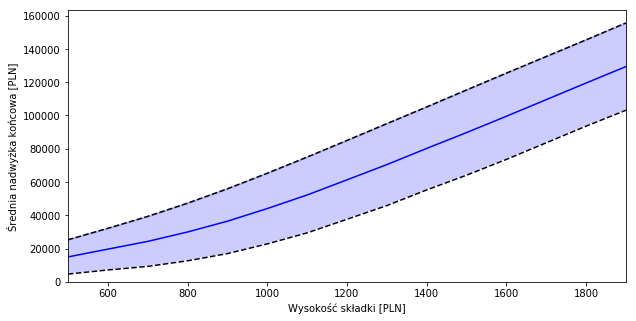

In [26]:
# ## RAPORT 
# 
# ### Zbadaj płynność firmy w zależności od parametrów
# 
# **Pytania**
# 1. Jaką ustalić składkę OC, aby ruina kierowców nie była udziałem PiTU S.A.?
# 2. Czy nadwyżka końcowa będzie równa początkowej?
# 3. Jakie jest zagrożenie ruiną?
# 4. Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01?
# 5. Jak liczba symulacji wpływa na wyniki?

# %%
# Wykres sredniej koncowej nadwyzki dodatniej

plotdata = dane.loc[(10000, slice(None)),['sr_wynik', 'odch_stand_wynik']]
plotdata['upper'] = plotdata.sr_wynik + plotdata.odch_stand_wynik
plotdata['lower'] = plotdata.sr_wynik - plotdata.odch_stand_wynik

fig, ax = plt.subplots(figsize = (10,5))
plotdata.reset_index().plot(x = 'skladka', y = 'upper', legend = False,
                    ax = ax, kind = 'area', color = 'blue', alpha = 0.2)
plotdata.reset_index().plot(x = 'skladka', y = 'lower', legend = False,
                    ax = ax, kind = 'area', color = 'white')
plotdata.reset_index().plot(x = 'skladka', y = ['sr_wynik', 'upper', 'lower'],
                    legend = False, ax = ax, style = ['b', '--k', '--k'])
ax.set_xlabel('Wysokość składki [PLN]')
ax.set_ylabel('Średnia nadwyżka końcowa [PLN]')
#fig.savefig(path+r'\nadwyzka.pdf')


# %% Porownanie dla kilku wysokosci nadwyzki

In [27]:
# In[]:

#Inny kod
import numpy.random as rd

def symuluj_ubezpieczenia(l_klientow,nadwyzka,skladka,srednia_l_szkod,sr_szkoda_ln,std_szkoda_ln):
    daty_umow = rd.randint(0,365, l_klientow)
    kal_l_wplat = np.zeros(365+365+30, dtype="int")
    for dataUmowy in daty_umow:
        kal_l_wplat[dataUmowy] += 1
    l_szkod_k = rd.poisson(srednia_l_szkod,l_klientow)
    kal_l_wyplat = np.zeros(365+365+30, dtype="int") #365 to zapas
    for k in range(l_klientow):
        for s in range(l_szkod_k[k]):
            #dla kazdej szkody ustal date wyplaty
            data_wyp = daty_umow[k]+rd.randint(0,365)+rd.randint(15,30)
            kal_l_wyplat[data_wyp] += 1
    for dzien in range(len(kal_l_wyplat)):
        nadwyzka += kal_l_wplat[dzien]*skladka
        l_wyplat = kal_l_wyplat[dzien]
        odszkodowania = 0
        if l_wyplat>0:
            odszkodowania=np.sum(np.exp(rd.normal(sr_szkoda_ln,std_szkoda_ln,l_wyplat)))
        if (nadwyzka<odszkodowania):
            return (nadwyzka-odszkodowania, dzien)
        nadwyzka -= odszkodowania
    return (nadwyzka, dzien)

# In[]:
   

In [28]:
 
def run_symulacja(blok):
    l_szkod = { # liczba szkod : liczba polis
            0 : 3437,
            1 : 522,
            2 : 40,
            3 : 2,
            4 : 0,
            5 : 0
    }
    
    srednia_l_szkod = sum( [x*y for x,y in l_szkod.items()] )*1./sum(l_szkod.values())
    sr_szkoda_ln = 7.9953648143576634
    std_szkoda_ln = 0.9644771368064744
    for skladka in range(500+blok*100,500+(blok+1)*100,25):
            rd.seed(0)
            wyniki=[symuluj_ubezpieczenia(10000,10000,\
                                          skladka,srednia_l_szkod,sr_szkoda_ln,std_szkoda_ln) \
                for i in range(100)]
            srednia = np.mean([x[0] for x in wyniki if x[0] >= 0])
            liczba_ruin = np.sum([1 for x in wyniki if x[0] < 0])
            sredni_dzien_ruiny = np.mean([x[1] for x in wyniki if x[0] < 0])
            return([skladka,srednia,liczba_ruin,sredni_dzien_ruiny])

In [62]:
# In[]:
sredni_dzien_ruiny = []
srednia = []
wysokosc_skladki = []   
liczba_ruin = []  
       
for nadwyzka in range(10000, 20000, 10000):
        wartosc_g_xy = run_symulacja(1)
        wysokosc_skladki.append(wartosc_g_xy[0])
        liczba_ruin.append(wartosc_g_xy[2])
        sredni_dzien_ruiny.append(wartosc_g_xy[3])
        srednia.append(wartosc_g_xy[1])
        print("Nadwyzka: ", nadwyzka, "Skladka: ", wartosc_g_xy[0], 
              "Liczba ruin: ", wartosc_g_xy[2], "Sredni wynik: ",
              round(wartosc_g_xy[1]), "Sredni dzien ruiny: ", wartosc_g_xy[3])

Nadwyzka:  10000 Skladka:  600 Liczba ruin:  100 Sredni wynik:  nan Sredni dzien ruiny:  542.83


c:\projects\wm_logic\clean\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\projects\wm_logic\clean\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
